In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [20]:
umsatz_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/umsatzdaten_gekuerzt.csv'
df_umsatzdaten = pd.read_csv(umsatz_csv_url)

inflationz_txt = 'inflation.txt'
df_inflation = pd.read_csv(inflationz_txt,sep=" ")

# source: https://www.finanz-tools.de/inflation/inflationsraten-deutschland

In [21]:
df_inflation

,Jahr,Inflationsrate
0,2013,1.53
1,2014,0.97
2,2015,0.53
3,2016,0.53
4,2017,1.47
5,2018,1.76


In [22]:
# Datumsbereich generieren
date_range = pd.date_range(start='2013-07-01', end='2017-12-27')

# Neuen DataFrame mit täglichen Daten erstellen
df_inflation = pd.DataFrame({
    'Datum': date_range,
    'Inflationsrate': [df_inflation.loc[df_inflation['Jahr'] == datum.year, 'Inflationsrate'].values[0] for datum in date_range]
})

print(df_inflation)

          Datum  Inflationsrate
0    2013-07-01            1.53
1    2013-07-02            1.53
2    2013-07-03            1.53
3    2013-07-04            1.53
4    2013-07-05            1.53
...         ...             ...
1636 2017-12-23            1.47
1637 2017-12-24            1.47
1638 2017-12-25            1.47
1639 2017-12-26            1.47
1640 2017-12-27            1.47

[1641 rows x 2 columns]


In [23]:
df_umsatzdaten

,Datum,Warengruppe,Umsatz
0,2013-07-01,1,148.828353
1,2013-07-02,1,159.793757
2,2013-07-03,1,111.885594
3,2013-07-04,1,168.864941
4,2013-07-05,1,171.280754
...,...,...,...
9329,2017-12-21,6,87.471228
9330,2017-12-22,6,71.911652
9331,2017-12-23,6,84.062223
9332,2017-12-24,6,60.981969


In [24]:
# Konvertieren Sie die 'Datum'-Spalte in beiden DataFrames zu datetime
df_umsatzdaten['Datum'] = pd.to_datetime(df_umsatzdaten['Datum'])
df_inflation['Datum'] = pd.to_datetime(df_inflation['Datum'])

#Zusammenführung der Dataframes

df_umsatz_inflation = df_umsatzdaten.merge(df_inflation, on='Datum', how='left')

#Problem: Nur übereinstimmende Werte für 'Datum' werden im zusammengeführten Dataframe angezeigt

print(df_umsatz_inflation.head())
print(df_umsatz_inflation.shape) 

       Datum  Warengruppe      Umsatz  Inflationsrate
0 2013-07-01            1  148.828353            1.53
1 2013-07-02            1  159.793757            1.53
2 2013-07-03            1  111.885594            1.53
3 2013-07-04            1  168.864941            1.53
4 2013-07-05            1  171.280754            1.53
(9334, 4)


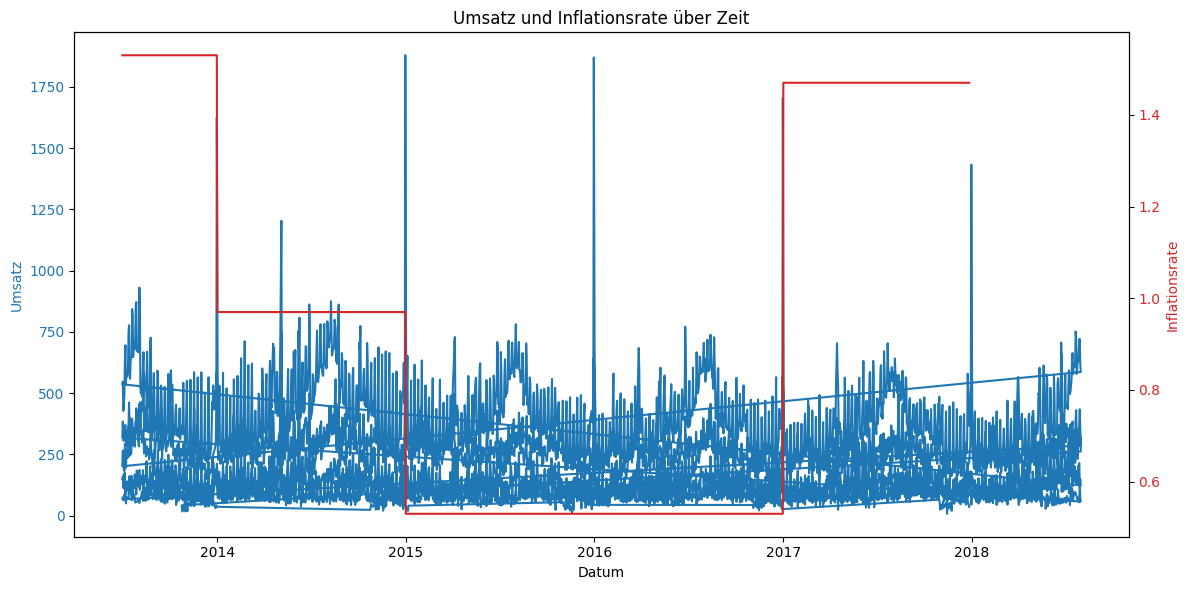

In [25]:
# Erstellen einer Figur mit zwei y-Achsen
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot für Umsatz
ax1.set_xlabel('Datum')
ax1.set_ylabel('Umsatz', color='tab:blue')
ax1.plot(df_umsatzdaten['Datum'], df_umsatzdaten['Umsatz'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Zweite y-Achse für Inflation
ax2 = ax1.twinx()
ax2.set_ylabel('Inflationsrate', color='tab:red')
ax2.plot(df_inflation['Datum'], df_inflation['Inflationsrate'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Titel und Layout
plt.title('Umsatz und Inflationsrate über Zeit')
fig.tight_layout()
plt.show()